# Part 3: Modeling
In the previous two parts of the training you've worked on: data ingestion, data analysis and feature engineering. This last part is an open end exercise where you'll have a lot of freedom to explore your topics of interest.

In this part you'll use the data with all the features that you've created in part 2. Use `scikit-learn` to try and model a baseline and linear regression or random forest model. You'll need to come up with a metric and evaluation strategy. This exercise has little constraints. You'll be provided with some hints for things to look at, but feel free to use different approaches. 

Below, we will set out the main sections that you'll need to deal with.

In [2]:
import pandas as pd
import numpy as np

---

## Load your prepared dataset
Make sure you saved the dataframe in which you created all the features. Load it in this step.

In [5]:
df = pd.read_parquet('data/ex_2.parquet')

In [9]:
df.head()

,power,power_lag_1,power_lag_2,power_ma_7,power_var_7,power_ma_14,power_var_14,power_ma_21,power_var_21,power_ma_28,power_var_28,power_ma_35,power_var_35
datetime,,,,,,,,,,,,,
2007-01-19,15069.000000,16530.700000,22160.466667,21720.290476,4.572838e+07,19947.933333,2.679037e+07,23326.803175,1.030594e+08,26101.089286,1.541477e+08,24948.426667,1.402541e+08
2007-01-20,31242.866667,15069.000000,16530.700000,21756.190476,4.651403e+07,20913.592857,3.521906e+07,23717.160317,1.060286e+08,25012.033333,1.068644e+08,25421.624762,1.380882e+08
2007-01-21,29275.700000,31242.866667,15069.000000,21486.538095,4.110419e+07,21731.880952,3.914045e+07,22664.212698,6.812670e+07,25028.158333,1.069991e+08,25202.454286,1.345690e+08
2007-01-22,20943.566667,29275.700000,31242.866667,22005.576190,3.793219e+07,21846.278571,3.873482e+07,21776.538095,5.313217e+07,24656.797619,1.059977e+08,25257.172381,1.339783e+08
2007-01-23,23502.333333,20943.566667,29275.700000,22674.947619,3.608805e+07,22424.595238,3.539495e+07,22217.414286,5.023999e+07,23818.648810,8.687780e+07,25553.470476,1.296543e+08


---

## Metrics
Choose one or more metrics that you're going to optimise with your model. 
- Reason about which metric(s) you want to use and why.  
-`scikit-learn` implements some default metrics that you might be interested in. See if you want and can leverage this.


In [10]:
# We'll use mean absolute error since it's easy to explain. Alternatively you can use RMSE, MAPE
from sklearn.metrics import mean_absolute_error

---

# Train, validation and test sets
To train, validate and evaluate your baseline and models, you'll need to split your data (see the first image). Remember that when working with timeseries, you cannot just use a simple cross validation since your data is autocorrelated. 

To work around this, you can look into walk-forward optimistation or just timeseries cross validation (see the second image). Walk forward optimisation differs slightly from the standard cross-validation (see third image). The standard cross validation does not respect the order of the data.

Note that `scikit-learn` integrates very nicely with `pandas`. For some help with splitting your data, see [this](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) link.


### *Train, validation and test split*
<img src="https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png" width="500px"/>

### *Walk forward optimisation*
<img src="https://conlanscientific.com/media/content/walk-forward-optimization.png" width="500px"/>

### *Standard cross-validation*
<img src="https://miro.medium.com/max/1400/1*dJ_8Xg8dYn46umdPq0Qpsg.png" width="500px"/>

In [27]:
from sklearn.model_selection import train_test_split

In [18]:
# For simplicity we'll split the data in train and test
train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [32]:
# Verify that there is no overlap between train and test
print(f"Train date range {train.index.min()} to {train.index.max()}. \
Test date range {test.index.min()} to {test.index.max()}")


Train date range 2007-01-19 00:00:00 to 2010-02-17 00:00:00. Test date range 2010-02-18 00:00:00 to 2010-11-26 00:00:00


---

# Baseline
Once you've decided on a metric, you should create a baseline model. This does not have to be a scikit-learn model, it can also be something more trivial. 

In [33]:
# Let's use the average as baseline
baseline_prediction = train['power'].mean()

---

# Modeling
Now that you've chosen a metric to optimise and have set a baseline, it's time to start modeling. See if you can use your prepared dataset and a `scikit-learn` model of your choice to create predictions that beat the baseline.

In [52]:
from sklearn.linear_model import Ridge

model = Ridge()
X_train = train.drop('power', axis=1)
y_train = train['power']

model = model.fit(X_train, y_train)

In [59]:
# Inspect feature importances
features = zip(X_train.columns, model.coef_)
df_features = pd.DataFrame(list(features), columns=['feature', 'coef'])
df_features

,feature,coef
0,power_lag_1,0.126032
1,power_lag_2,-0.259332
2,power_ma_7,1.356091
3,power_var_7,-0.000036
4,power_ma_14,-0.503845
5,power_var_14,0.000023
6,power_ma_21,0.457802
7,power_var_21,0.000025
8,power_ma_28,-0.078218
9,power_var_28,-0.000053


<AxesSubplot:xlabel='feature'>

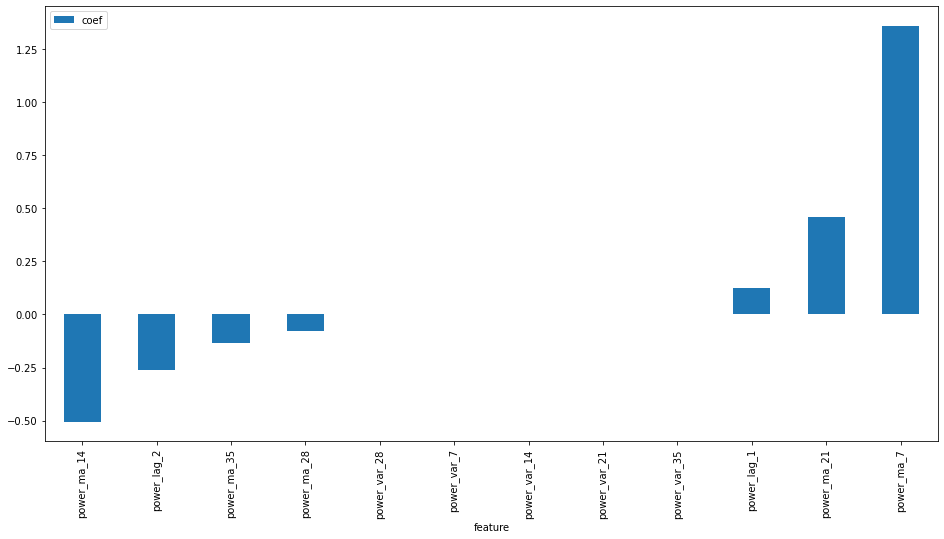

In [65]:
df_features.set_index('feature').sort_values(by='coef').plot(kind='bar', figsize=(16,8))

In [66]:
X_test = test.drop('power', axis=1)
linear_model_predictions = model.predict(X_test)

---

# Evaluation
Evaluate your model against the metrics that you specified. Use time-series cross validation to optimise any hyperparameters. Use your validation set to conclude the performance of your final model.

The test set is not used in this process. You typically use this once and save it for the final evaluation.

In [67]:
predictions = test[['power']].assign(baseline = baseline_prediction, linear_model = linear_model_predictions)

<AxesSubplot:xlabel='datetime'>

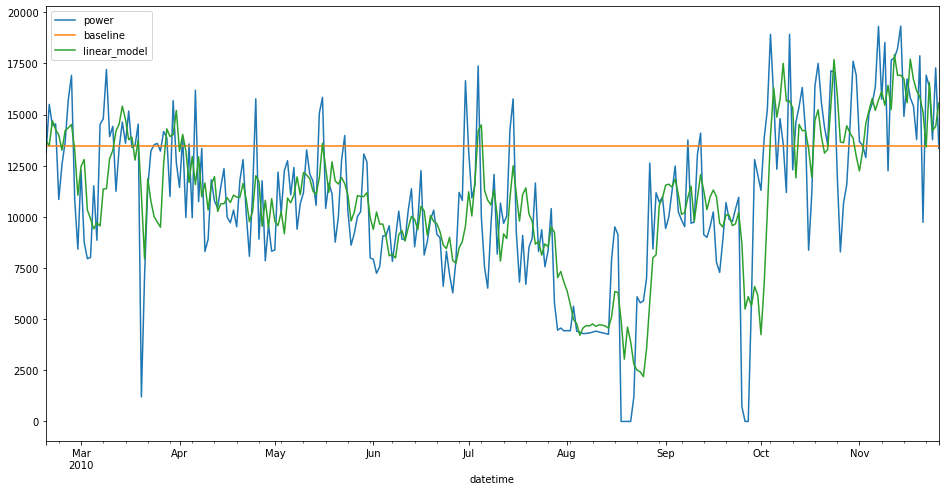

In [70]:
predictions.plot(figsize=(16,8))

In [71]:
baseline_mae = mean_absolute_error(predictions['power'], predictions['baseline'])
print(baseline_mae)

3695.525097732929


In [72]:
linear_model_mae = mean_absolute_error(predictions['power'], predictions['linear_model'])
print(linear_model_mae)

1928.8158332264738
